In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('data/energy_efficiency_data.csv')
df.columns = df.columns.str.lower()
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [45]:
print("Number of samples: %.0f" % df.shape[0])
print("Number of features: %.0f" % df.shape[1])

Number of samples: 768
Number of features: 10


## Data Validation

In [15]:
df.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

The dataset is clean.

In [16]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

## Exploratory Data Analysis

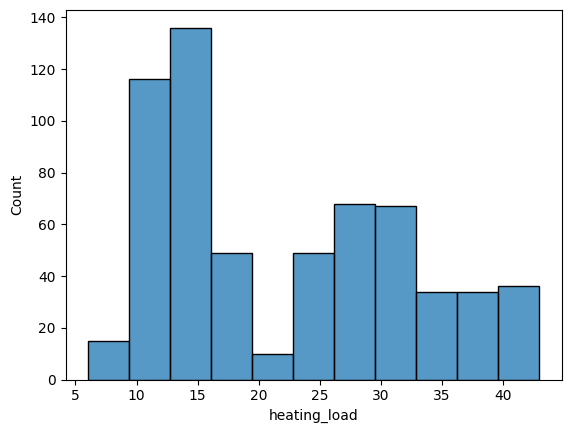

In [20]:
sns.histplot(df_train_full['heating_load'])
plt.show()

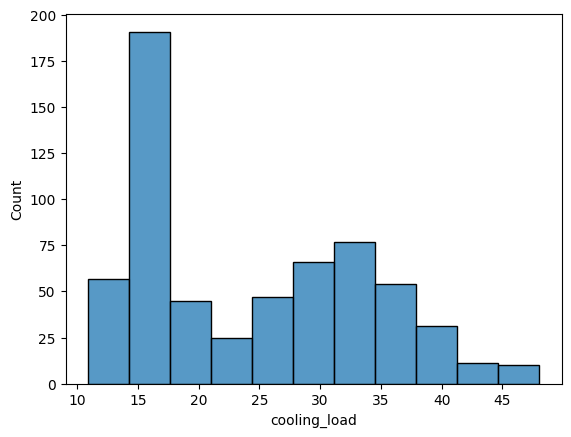

In [21]:
sns.histplot(df_train_full['cooling_load'])
plt.show()

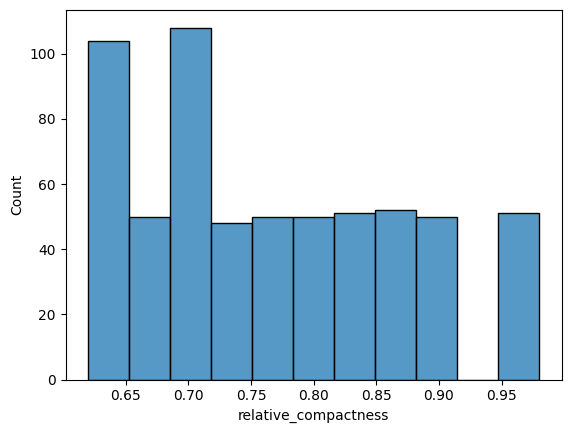

In [22]:
sns.histplot(df_train_full['relative_compactness'])
plt.show()

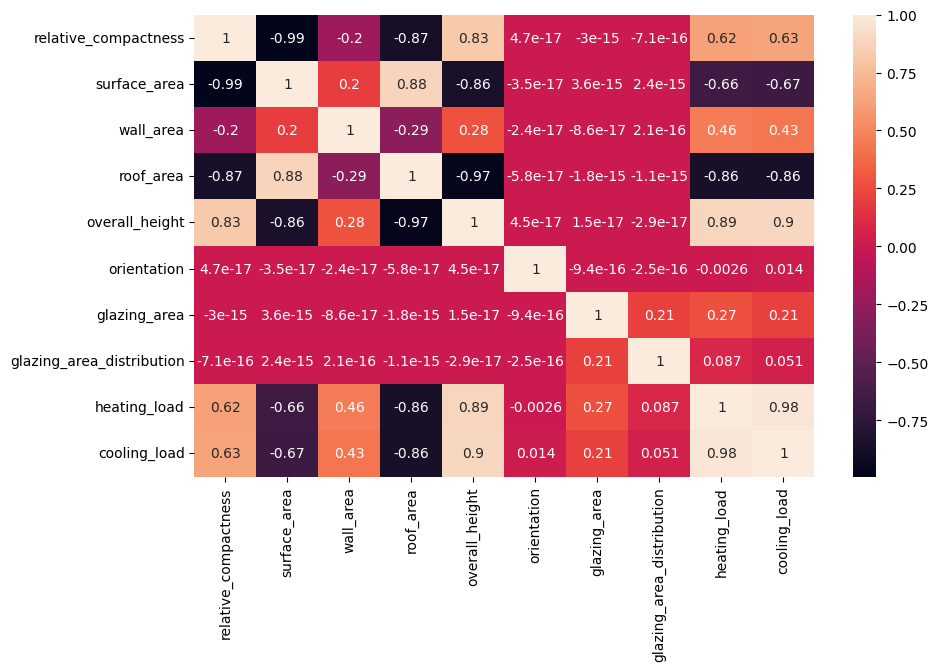

In [32]:
corr_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [37]:
X_train = df_train.drop(['heating_load', 'cooling_load'], axis=1)
X_val = df_val.drop(['heating_load', 'cooling_load'], axis=1)

y_train = df_train['cooling_load']
y_val = df_val['cooling_load']

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

score_model_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
score_model_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print("RMSE Train: ", score_model_train)
print("RMSE Validation: ", score_model_val)

RMSE Train:  3.2225340433898517
RMSE Validation:  3.077197428950499


In [43]:
X_test = df_test.drop(['heating_load', 'cooling_load'], axis=1)

y_test = df_test['cooling_load']

y_pred_test = model.predict(X_test)

score_model_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("RMSE Test: ", score_model_test)

RMSE Test:  3.213408641084607
